In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

/home/ktai17/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
"MNIST_data/ 라는 폴더를 만들고, 4개의 압축파일을 만들어줌."

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


'MNIST_data/ 라는 폴더를 만들고, 4개의 압축파일을 만들어줌.'

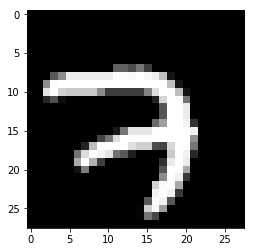

In [3]:
img=mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

In [ ]:
'''
1. Convolution
'''

In [4]:
sess = tf.InteractiveSession()
img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))  ## 3 by 3filter, 색, filter 5개.
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME') # 가로로 2씩, 세로로 2씩 건너뛴다.
print(conv2d)

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


In [5]:
sess.run(tf.global_variables_initializer()) # 초기값 잡고

In [6]:
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

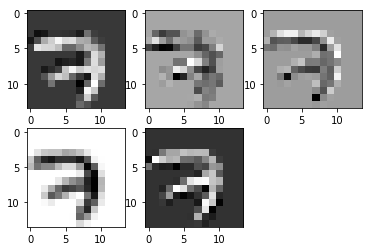

In [17]:
for i, one_img in enumerate(conv2d_img):
    plt.subplot(2, 3, i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

In [9]:
'''
2. Pooling
'''

'\n2. Pooling\n'

In [12]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
# strides=[1, 2, 2, 1]에서 2,2 -> 1/2로 줄여줌.

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


In [15]:
sess.run(tf.global_variables_initializer())

pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

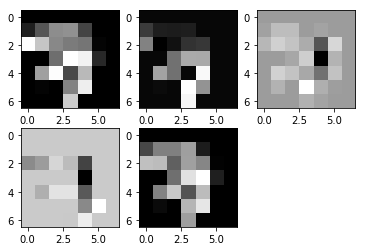

In [18]:
for i, one_img in enumerate(pool_img):
    plt.subplot(2, 3, i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')